### Neural Network as Function Approximator

Reference: https://machinelearningmastery.com/neural-networks-are-function-approximators/

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error

# Function 1
## y = x**2

In [2]:
x = np.asarray([i for i in range(-50,51)])
y = np.asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())

-50 50 0.0 2500.0


In [3]:
len(x)

101

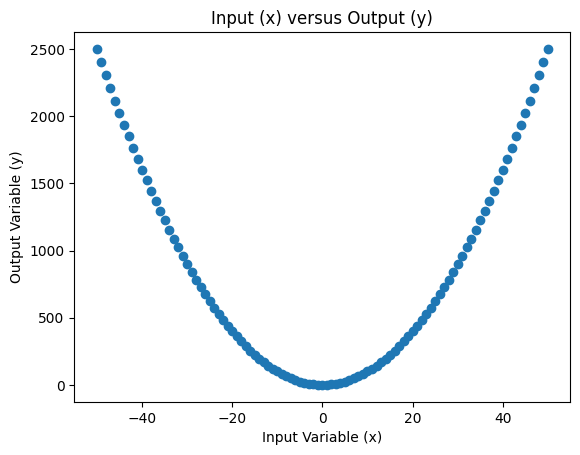

In [4]:
plt.scatter(x,y)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.show()

In [5]:
x_org = x.reshape((len(x), 1))
y_org = y.reshape((len(y), 1))

In [6]:
# prompt: Write code to shuffle x_org and y_org
#x, y = shuffle(x_org, y_org)
x = x_org
y = y_org

In [7]:
scale_x = MinMaxScaler()
X_train = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y_train = scale_y.fit_transform(y)
print(X_train.min(), X_train.max(), y_train.min(), y_train.max())

0.0 1.0 0.0 1.0


In [8]:
##first model we learn - in keras, sequential model, specifically the feed foward model
model = tf.keras.Sequential()
## this sequential model has 3 layers
## this layer has 10 hidden units
model.add(tf.keras.layers.Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'))
## 1 output layer
model.add(tf.keras.layers.Dense(1))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
## what's the loss function, which optimizer to use
model.compile(loss="mse",optimizer="adam", metrics=["mse"])

In [12]:
history = model.fit(X_train, y_train, epochs=10000, verbose=False)
## this of epohcs and duration; you want the loss function to decrease over epoch

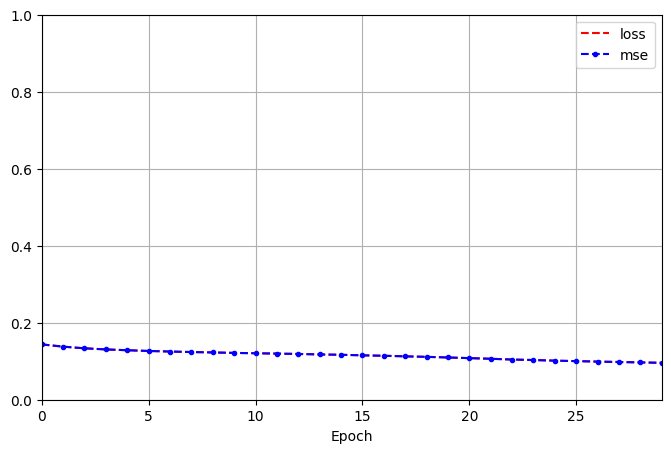

In [13]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "b--.", "b-", "b-*"])
plt.show()

4/4 [==============================] - 0s 750us/step


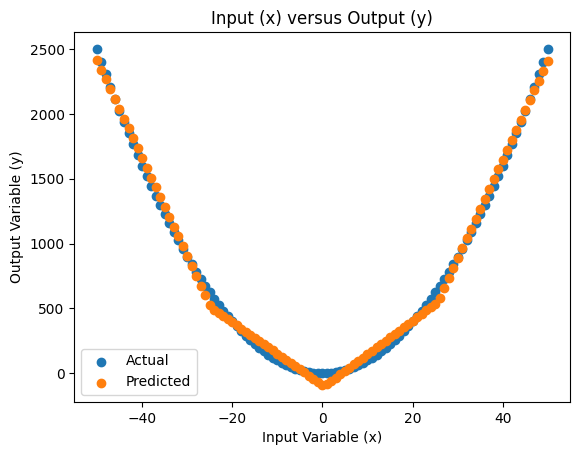

In [14]:
# make predictions for the input data
yhat = model.predict(X_train)
# inverse transforms
x_plot = scale_x.inverse_transform(X_train)
y_plot = scale_y.inverse_transform(y_train)
yhat_plot = scale_y.inverse_transform(yhat)
# # report model error
# print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))
# plot x vs y
plt.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
plt.scatter(x_plot,yhat_plot, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

# Function 2
## 0.2 + 0.4 * i**2 + 0.3 * i * np.sin(15 * i)+ 0.05 * np.cos(50 * i)

In [15]:
x1 = np.asarray([i for i in np.arange(0,1, 0.01)])
y1 = np.asarray([0.2 + 0.4 * i**2 + 0.3 * i * np.sin(15 * i)+ 0.05 * np.cos(50 * i) for i in x1])

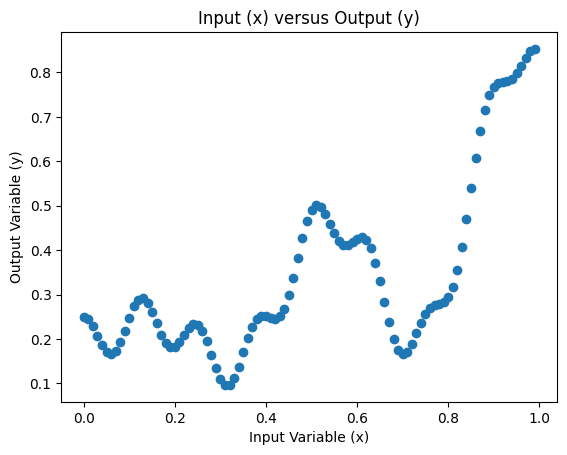

In [16]:
plt.scatter(x1,y1)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.show()

In [17]:
x1_org = x1.reshape((len(x1), 1))
y1_org = y1.reshape((len(y1), 1))

In [18]:
scale_x = MinMaxScaler()
X_train = scale_x.fit_transform(x1_org)
scale_y = MinMaxScaler()
y_train = scale_y.fit_transform(y1_org)
print(X_train.min(), X_train.max(), y_train.min(), y_train.max())

0.0 1.0 0.0 0.9999999999999999


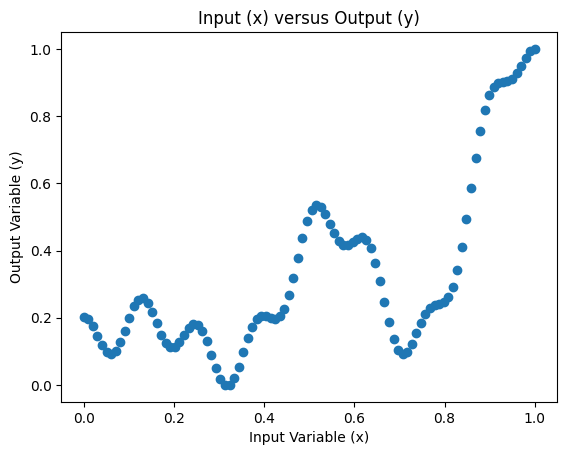

In [19]:
plt.scatter(X_train,y_train)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.show()

In [20]:
models_list = {}

In [21]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dense(1))

In [22]:
models_list[(10, 10, "linear")] = model1

In [23]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(100, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dense(1))

In [24]:
models_list[(100, 100, "linear")] = model2

In [25]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(1000, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model3.add(tf.keras.layers.Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model3.add(tf.keras.layers.Dense(1))

In [26]:
models_list[(1000, 1000, "linear")] = model3

In [27]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(100, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model4.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model4.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model4.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [28]:
models_list[(100, 100, 100, "sigmoid")] = model4

In [29]:
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model5.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'))
model5.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'))
model5.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [30]:
models_list[(10, 10, 10, "sigmoid")] = model5

In [31]:
model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model6.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'))
model6.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [32]:
models_list[(10, 10, "sigmoid")] = model6

In [33]:
model7 = tf.keras.Sequential()
model7.add(tf.keras.layers.Dense(100, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model7.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model7.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [34]:
models_list[(100, 100, "sigmoid")] = model7

In [35]:
gs = gridspec.GridSpec(7, 2)
fig = plt.figure(figsize=(200, 200))
# ax1 = plt.subplot(gs[1,0])
# ax2 = plt.subplot(gs[1,1])
# ax3 = plt.subplot(gs[2,0])
# ax4 = plt.subplot(gs[2,1])
# ax5 = plt.subplot(gs[0,0])
# ax6 = plt.subplot(gs[0,1])


<Figure size 20000x20000 with 0 Axes>

In [36]:
index = 0

4/4 [==============================] - 0s 814us/step


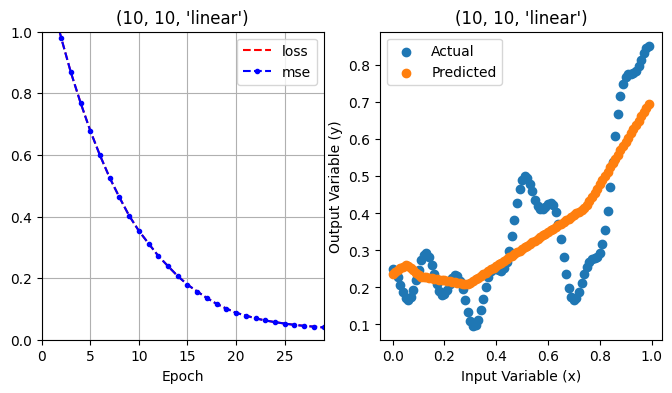

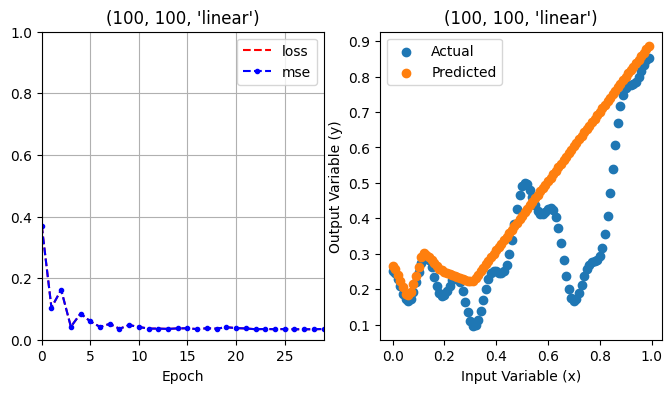

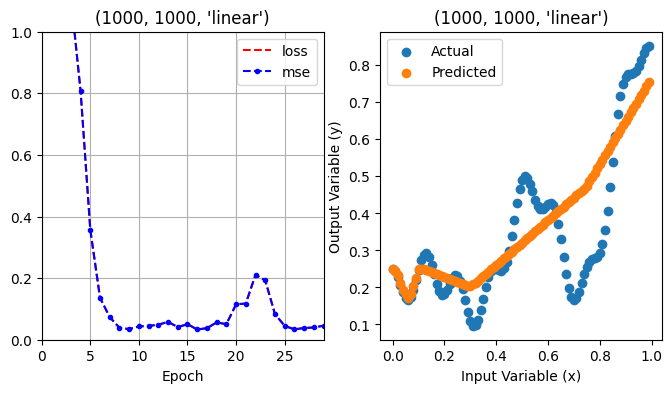

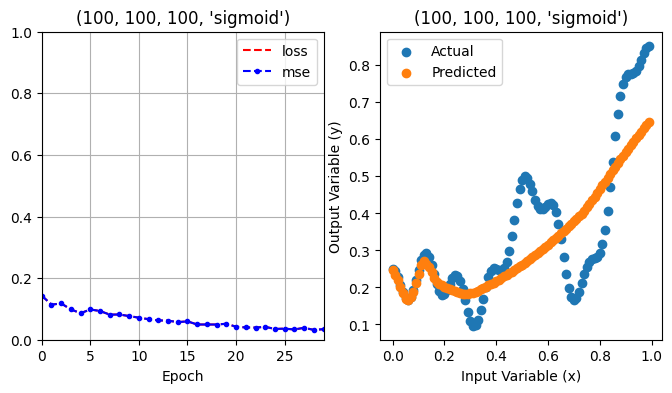

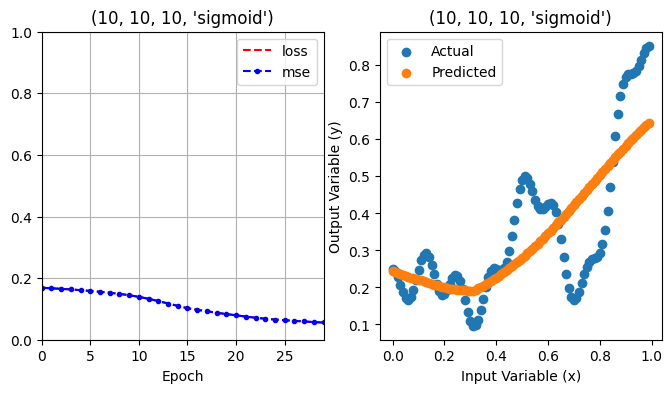

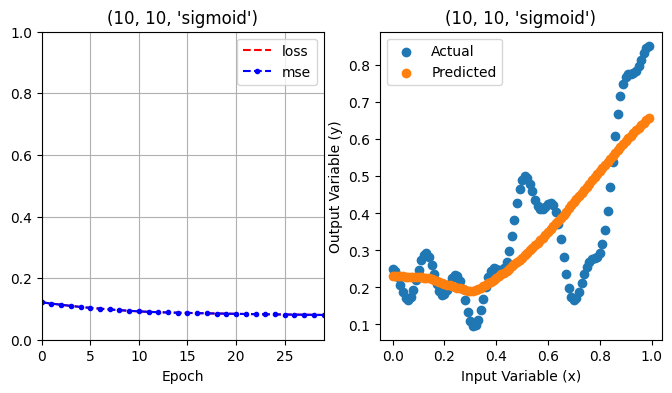

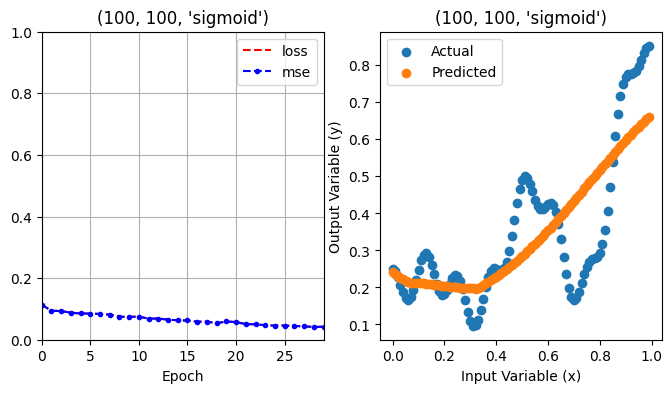

In [37]:
for key in models_list:
  model =  models_list[key]
  model.compile(loss="mse",optimizer="adam", metrics=["mse"])
  history = model.fit(X_train, y_train, epochs=500, verbose=False)

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
  ax1 = axes[0]
  ax1.set_title(key)
  pd.DataFrame(history.history).plot(
   xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
  style=["r--", "b--."], ax=ax1)
  #ax1.title(key)

  # make predictions for the input data
  yhat = model.predict(X_train)
  # inverse transforms
  x_plot = scale_x.inverse_transform(X_train)
  y_plot = scale_y.inverse_transform(y_train)
  yhat_plot = scale_y.inverse_transform(yhat)
  # # report model error
  # print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))
  # plot x vs y

  ax2 = axes[1]
  ax2.scatter(x_plot,y_plot, label='Actual')
  # plot x vs yhat
  ax2.scatter(x_plot,yhat_plot, label='Predicted')
  ax2.set_title(key)
  ax2.set_xlabel('Input Variable (x)')
  ax2.set_ylabel('Output Variable (y)')
  ax2.legend()
  #plt.show()

  index = index + 1

#Function 3
## 0.2 + 0.4 * i**2 + + 0.5 * 3**i + 0.3 * i * np.sin(15 * i)+ 0.05 * np.cos(50 * i)

In [38]:
x2 = np.asarray([i for i in np.arange(0,1, 0.01)])
y2 = np.asarray([0.2 + 0.4 * i**2 + + 0.5 * 3**i + 0.3 * i * np.sin(50 * i)+ 0.3 * np.cos(20 * i) for i in x2])

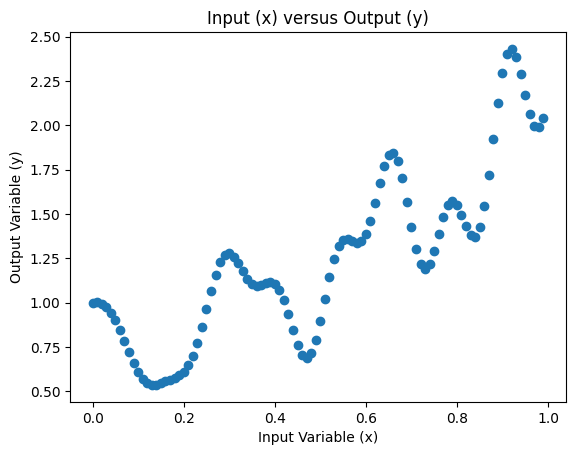

In [39]:
plt.scatter(x2,y2)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.show()

In [40]:
x2_org = x2.reshape((len(x2), 1))
y2_org = y2.reshape((len(y2), 1))

In [41]:
scale_x = MinMaxScaler()
X_train = scale_x.fit_transform(x2_org)
scale_y = MinMaxScaler()
y_train = scale_y.fit_transform(y2_org)
print(X_train.min(), X_train.max(), y_train.min(), y_train.max())

0.0 1.0 0.0 1.0


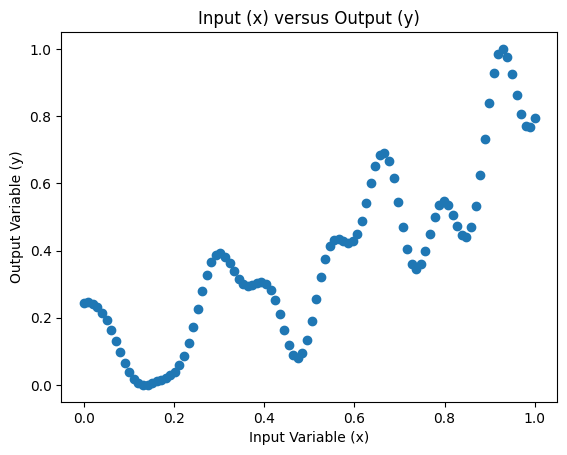

In [42]:
plt.scatter(X_train,y_train)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.show()

In [43]:
models_list = {}

In [44]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dense(1))

In [45]:
models_list[(10, 10, "linear")] = model1

In [46]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(100, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dense(1))

In [47]:
models_list[(100, 100, "linear")] = model2

In [48]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(1000, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model3.add(tf.keras.layers.Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model3.add(tf.keras.layers.Dense(1))

In [49]:
models_list[(1000, 1000, "linear")] = model3

In [50]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(100, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model4.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model4.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model4.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [51]:
models_list[(100, 100, 100, "sigmoid")] = model4

In [52]:
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model5.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'))
model5.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'))
model5.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [53]:
models_list[(10, 10, 10, "sigmoid")] = model5

In [54]:
model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model6.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'))
model6.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [55]:
models_list[(10, 10, "sigmoid")] = model6

In [56]:
model7 = tf.keras.Sequential()
model7.add(tf.keras.layers.Dense(100, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model7.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model7.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [57]:
models_list[(100, 100, "sigmoid")] = model7

In [67]:
model8 = tf.keras.Sequential()
model8.add(tf.keras.layers.Dense(1000, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model8.add(tf.keras.layers.Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model8.add(tf.keras.layers.Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model8.add(tf.keras.layers.Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model8.add(tf.keras.layers.Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model8.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [68]:
models_list[(1000, 1000, "sigmoid")] = model8

In [58]:
gs = gridspec.GridSpec(7, 2)
fig = plt.figure(figsize=(200, 200))
# ax1 = plt.subplot(gs[1,0])
# ax2 = plt.subplot(gs[1,1])
# ax3 = plt.subplot(gs[2,0])
# ax4 = plt.subplot(gs[2,1])
# ax5 = plt.subplot(gs[0,0])
# ax6 = plt.subplot(gs[0,1])


<Figure size 20000x20000 with 0 Axes>

In [59]:
index = 0

4/4 [==============================] - 0s 4ms/step


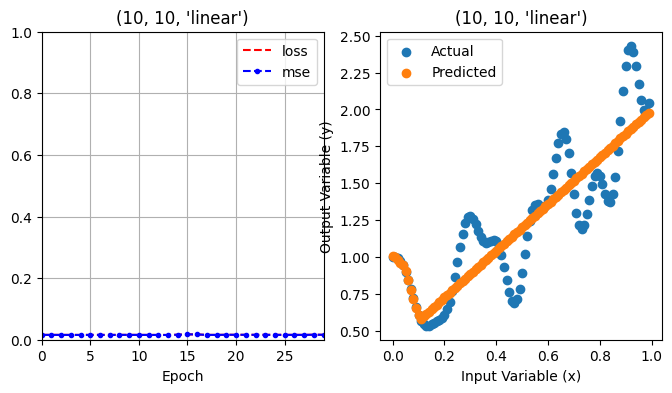

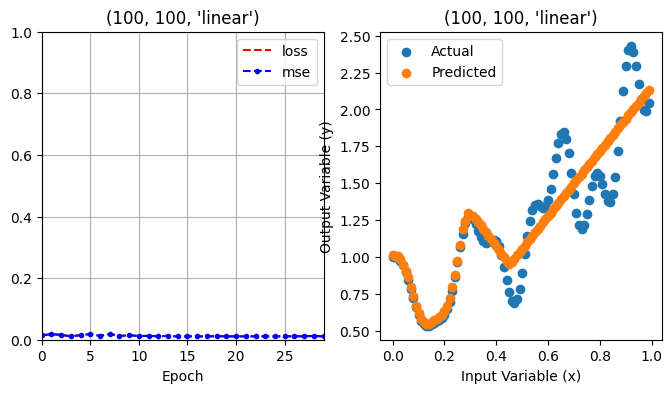

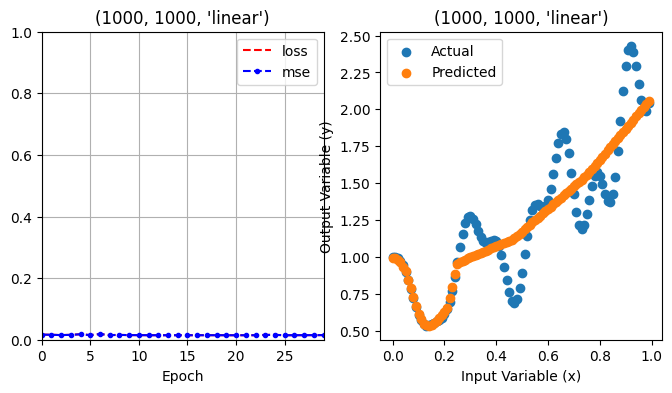

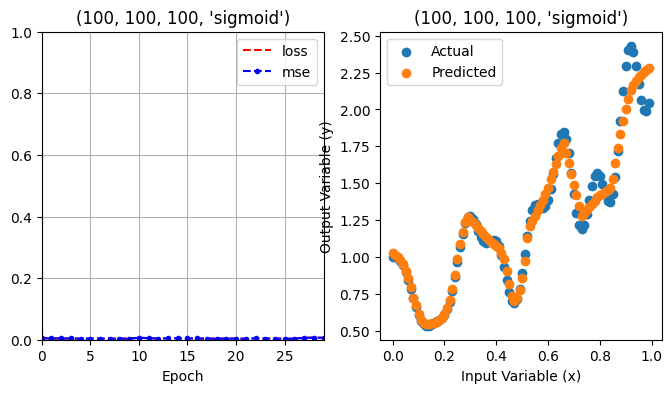

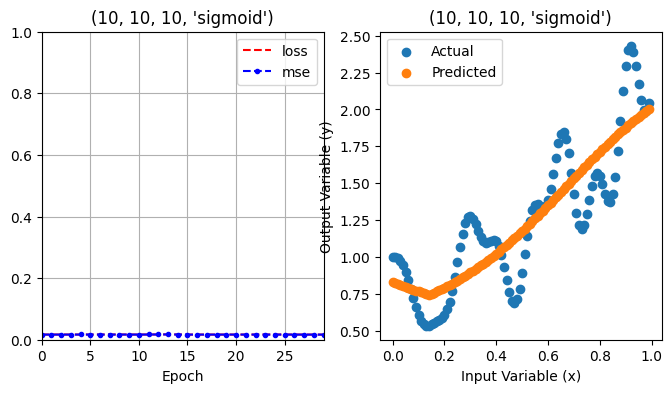

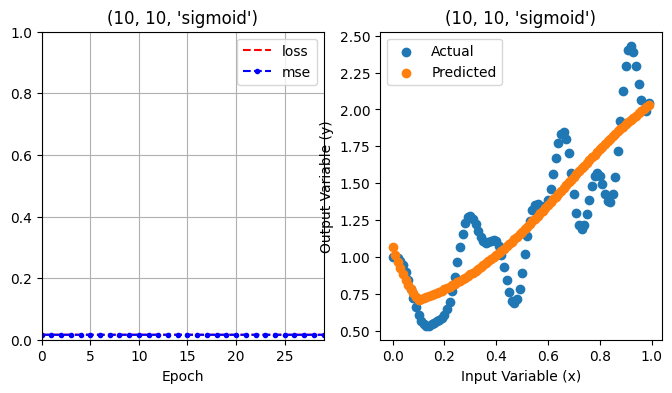

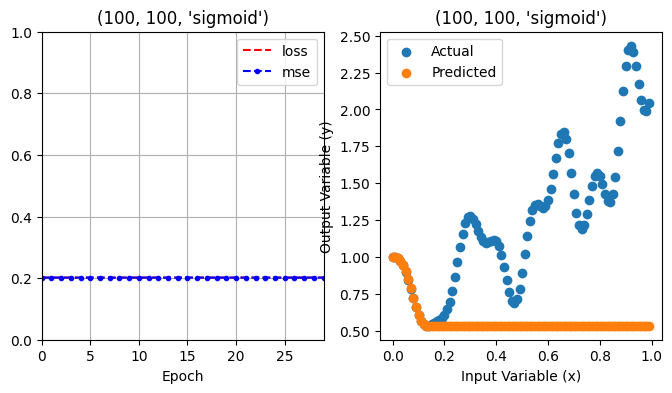

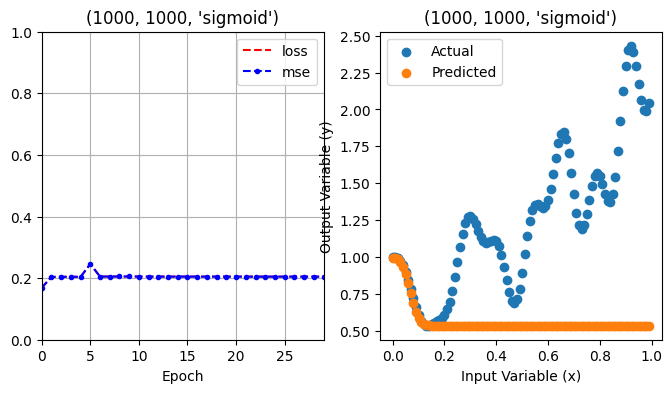

In [69]:
for key in models_list:
  model =  models_list[key]
  model.compile(loss="mse",optimizer="adam", metrics=["mse"])
  history = model.fit(X_train, y_train, epochs=500, verbose=False)

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
  ax1 = axes[0]
  ax1.set_title(key)
  pd.DataFrame(history.history).plot(
   xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
  style=["r--", "b--."], ax=ax1)
  #ax1.title(key)

  # make predictions for the input data
  yhat = model.predict(X_train)
  # inverse transforms
  x_plot = scale_x.inverse_transform(X_train)
  y_plot = scale_y.inverse_transform(y_train)
  yhat_plot = scale_y.inverse_transform(yhat)
  # # report model error
  # print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))
  # plot x vs y

  ax2 = axes[1]
  ax2.scatter(x_plot,y_plot, label='Actual')
  # plot x vs yhat
  ax2.scatter(x_plot,yhat_plot, label='Predicted')
  ax2.set_title(key)
  ax2.set_xlabel('Input Variable (x)')
  ax2.set_ylabel('Output Variable (y)')
  ax2.legend()
  #plt.show()

  index = index + 1